# Radio

## py rtl sdr documentation
https://pyrtlsdr.readthedocs.io/en/latest/rtlsdr.html

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d as gaussian
from scipy.signal import decimate
from rtlsdr import RtlSdr
import sounddevice as sd

In [103]:
# configure device & capture data
freq = 89.8e6 #mhz
sample_rate = 1140000
bandwidth = 180e+3
nr_samples = 2**18
time_interval = nr_samples/sample_rate

sdr = RtlSdr()
sdr.sample_rate = sample_rate
sdr.center_freq = freq
sdr.bandwidth = bandwidth
sdr.freq_correction = 60 #PPM
sdr.gain = 'auto'
samples = sdr.read_samples(nr_samples)
sdr.close()

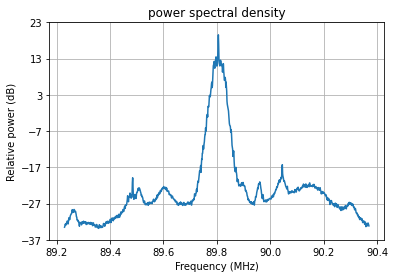

In [104]:
# power spectral density (sum of windowed fft)
from pylab import psd
psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
plt.title('power spectral density')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative power (dB)')
plt.show()

Text(0, 0.5, 'amplitude')

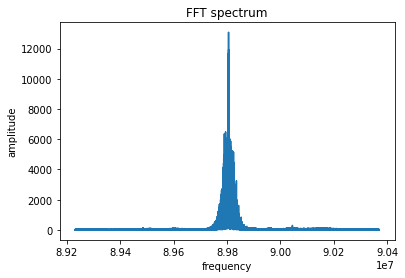

In [105]:
### simple fft spectrum
fig = plt.figure()
spectrum = np.fft.fftshift(np.fft.fft(samples))
frequencies = (np.arange(-nr_samples/2,nr_samples/2,1))*1/time_interval
plt.plot(freq + frequencies,abs(spectrum))
plt.title('FFT spectrum')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# Radio demodulation (FM)

In [106]:
freq = 89.8e6 #mhz
sample_rate = 285000
bandwidth = 180e+3
nr_samples = 2**18

sdr = RtlSdr()
sdr.sample_rate = sample_rate
sdr.center_freq = freq
sdr.bandwidth = bandwidth
sdr.freq_correction = 60 #PPM
sdr.gain = 'auto'
samples = sdr.read_samples(nr_samples)
sdr.close()

Text(0, 0.5, 'amplitude')

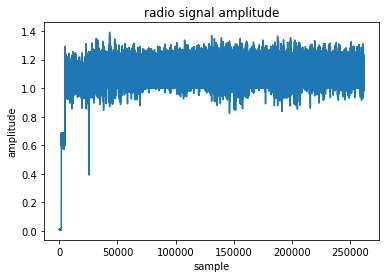

In [119]:
plt.plot(np.abs(samples))
plt.title('radio signal amplitude')
plt.xlabel('sample')
plt.ylabel('amplitude')

Text(0, 0.5, 'phase')

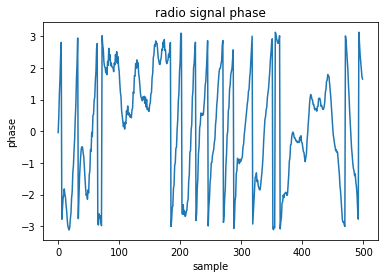

In [123]:
plt.plot(np.angle(samples[20000:20500]))
plt.title('radio signal phase')
plt.xlabel('sample')
plt.ylabel('phase')

Text(0, 0.5, 'phase')

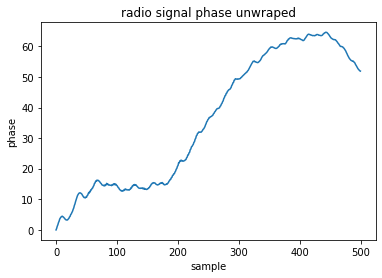

In [124]:
plt.plot(np.unwrap(np.angle(samples[20000:20500])))
plt.title('radio signal phase unwraped')
plt.xlabel('sample')
plt.ylabel('phase')

Text(0, 0.5, 'phase')

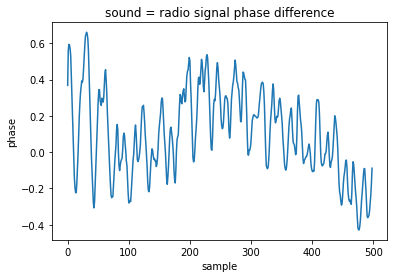

In [125]:
plt.plot(np.diff(gaussian(np.unwrap(np.angle(samples[20000:20500])),1)))
plt.title('sound = radio signal phase difference')
plt.xlabel('sample')
plt.ylabel('phase')

## generate and play sound

In [115]:
time_interval = nr_samples/sample_rate
print('the sound duration is: ',time_interval)

the sound duration is:  0.9198035087719298


In [116]:
#iq signal -> audio signal
sound = np.diff(gaussian(np.unwrap(np.angle(samples)),1))
sd.play(sound/50,sample_rate)

In [117]:
#faster computation
freq = np.real(samples)[1:]*np.diff(np.imag(samples)) - np.imag(samples)[1:]*np.diff(np.real(samples))
sd.play(freq/20,sample_rate)

In [118]:
#additional decimate signal
freq = np.real(samples)[1:]*np.diff(np.imag(samples)) - np.imag(samples)[1:]*np.diff(np.real(samples))
print('initial sample number: ',len(freq))
reduce = 4
freq = decimate(freq,reduce)
print('reduced sample number: ',len(freq))
sd.play(freq/20,sample_rate/reduce)

initial sample number:  262143
reduced sample number:  65536
